# Regressão Logística I
## Tarefa II

Vamos trabalhar com a mesma base do exercício anterior, mas vamos aprofundar um pouco mais a nossa regressão.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
from sklearn.metrics import roc_curve
from sklearn import metrics
from scipy.stats import ks_2samp

In [3]:
# Carregando os dados 
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df_raw = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])

# Definindo uma nova variável
df_raw['flag_doente'] = (df_raw['num']!=0).astype('int64')
df_raw.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [5]:
df = df_raw.copy()

#Renomeando colunas
colunas_nomes = {'age': 'idade', 'sex': 'sexo', 'cp': 'tipo_dor_peito', 'trestbps': 'pressao_sanguínea_repouso',
           'chol': 'colesterol', 'fbs': 'acucar_sangue_jejum', 'restecg': 'resultados_eletrocardiograma',
           'thalach': 'freq_card_max', 'exang': 'angina_exercicio', 'oldpeak': 'depressao_st_exercicio',
           'slope': 'inclinacao_st_exercicio', 'ca': 'num_vasos_coloridos', 'thal': 'status_normal_defeito', 
           'num': 'diagnostico_doenca'}
df.rename(columns=colunas_nomes, inplace=True)

df.head()

,idade,sexo,tipo_dor_peito,pressao_sanguínea_repouso,colesterol,acucar_sangue_jejum,resultados_eletrocardiograma,freq_card_max,angina_exercicio,depressao_st_exercicio,inclinacao_st_exercicio,num_vasos_coloridos,status_normal_defeito,diagnostico_doenca,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   idade                         303 non-null    float64
 1   sexo                          303 non-null    float64
 2   tipo_dor_peito                303 non-null    float64
 3   pressao_sanguínea_repouso     303 non-null    float64
 4   colesterol                    303 non-null    float64
 5   acucar_sangue_jejum           303 non-null    float64
 6   resultados_eletrocardiograma  303 non-null    float64
 7   freq_card_max                 303 non-null    float64
 8   angina_exercicio              303 non-null    float64
 9   depressao_st_exercicio        303 non-null    float64
 10  inclinacao_st_exercicio       303 non-null    float64
 11  num_vasos_coloridos           303 non-null    object 
 12  status_normal_defeito         303 non-null    object 
 13  diagn

**Há duas variáveis que estão no formato de string (`object`). Vamos analisar o motivo.**

In [8]:
# Descrição das variáveis numéricas
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
num_vasos_coloridos,303,5,0.0,176
status_normal_defeito,303,4,3.0,166


In [9]:
# Verificando os valores
df['num_vasos_coloridos'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [10]:
df['num_vasos_coloridos'].value_counts()

num_vasos_coloridos
0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: count, dtype: int64

In [11]:
df['status_normal_defeito'].value_counts()

status_normal_defeito
3.0    166
7.0    117
6.0     18
?        2
Name: count, dtype: int64

Note que há "?" que não possui significado, ou seja, é um dado faltante. Façamos,

In [13]:
# Ajuntando como nan
df['num_vasos_coloridos'] = df['num_vasos_coloridos'].replace('?', np.nan)
df['status_normal_defeito'] = df['status_normal_defeito'].replace('?', np.nan)

# Removendo faltantes
df.dropna(inplace=True)

In [14]:
# Modificando a variável para float
df['num_vasos_coloridos'] = df['num_vasos_coloridos'].astype(float)
df['status_normal_defeito'] = df['status_normal_defeito'].astype(float)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   idade                         297 non-null    float64
 1   sexo                          297 non-null    float64
 2   tipo_dor_peito                297 non-null    float64
 3   pressao_sanguínea_repouso     297 non-null    float64
 4   colesterol                    297 non-null    float64
 5   acucar_sangue_jejum           297 non-null    float64
 6   resultados_eletrocardiograma  297 non-null    float64
 7   freq_card_max                 297 non-null    float64
 8   angina_exercicio              297 non-null    float64
 9   depressao_st_exercicio        297 non-null    float64
 10  inclinacao_st_exercicio       297 non-null    float64
 11  num_vasos_coloridos           297 non-null    float64
 12  status_normal_defeito         297 non-null    float64
 13  diagnostic

##### Gerando um relatório simples das distribuições de valores dentro das variáveis

In [17]:
# Listando variáveis
lista_vars = list(df.columns)

# Gerando contagem
for var in lista_vars:
    print('Distribuição para a variável {}'.format(var))
    print(df[var].value_counts())
    print('\n--------------------------------------------')

Distribuição para a variável idade
idade
58.0    18
57.0    17
54.0    16
59.0    14
60.0    12
51.0    12
56.0    11
62.0    11
44.0    11
52.0    11
64.0    10
41.0    10
67.0     9
63.0     9
42.0     8
45.0     8
55.0     8
61.0     8
65.0     8
50.0     7
66.0     7
43.0     7
48.0     7
53.0     7
46.0     7
47.0     5
49.0     5
70.0     4
68.0     4
35.0     4
39.0     4
69.0     3
71.0     3
40.0     3
34.0     2
37.0     2
29.0     1
77.0     1
38.0     1
74.0     1
76.0     1
Name: count, dtype: int64

--------------------------------------------
Distribuição para a variável sexo
sexo
1.0    201
0.0     96
Name: count, dtype: int64

--------------------------------------------
Distribuição para a variável tipo_dor_peito
tipo_dor_peito
4.0    142
3.0     83
2.0     49
1.0     23
Name: count, dtype: int64

--------------------------------------------
Distribuição para a variável pressao_sanguínea_repouso
pressao_sanguínea_repouso
120.0    37
130.0    36
140.0    32
110.0    19

In [18]:
# Agora, com todas as variáveis numéricas

df.select_dtypes('number').describe().T

,count,mean,std,min,25%,50%,75%,max
idade,297.0,54.542088,9.049736,29.0,48.0,56.0,61.0,77.0
sexo,297.0,0.676768,0.468500,0.0,0.0,1.0,1.0,1.0
tipo_dor_peito,297.0,3.158249,0.964859,1.0,3.0,3.0,4.0,4.0
pressao_sanguínea_repouso,297.0,131.693603,17.762806,94.0,120.0,130.0,140.0,200.0
colesterol,297.0,247.350168,51.997583,126.0,211.0,243.0,276.0,564.0
acucar_sangue_jejum,297.0,0.144781,0.352474,0.0,0.0,0.0,0.0,1.0
resultados_eletrocardiograma,297.0,0.996633,0.994914,0.0,0.0,1.0,2.0,2.0
freq_card_max,297.0,149.599327,22.941562,71.0,133.0,153.0,166.0,202.0
angina_exercicio,297.0,0.326599,0.469761,0.0,0.0,0.0,1.0,1.0
depressao_st_exercicio,297.0,1.055556,1.166123,0.0,0.0,0.8,1.6,6.2


1. Considere o script que monta a análise bivariada que você fez na tarefa anterior. Transforme esse script em uma função, que deve:
- Ter como parâmetros de entrada:
    - Um *dataframe* contendo os dados a serem avaliados
    - Um *string* contendo o nome da variável resposta
    - Um *string* contendo o nome da variável explicativa
- E deve retornar um *dataframe* com os dados da bivariada. 
**Monte** a mesma bivariada pelo menos três variáveis qualitativas do *data-frame*. Qual delas parece discriminar mais o risco?

In [20]:
# Função bivariada (var discreta)

def crosstab_function_bivar(dataframe, var_explicativa, var_resposta='flag_doente'):
    tab = pd.crosstab(dataframe[var_explicativa], dataframe[var_resposta],
                    margins=True, margins_name='total')
    tab['media'] = tab[1]/tab['total']
    tab['odds'] = tab[1] / tab[0] # Ocorrência pela não ocorrência
    tab['odds_ratio'] = tab['odds'] / tab.loc['total', 'odds']
    tab['logito'] = np.log(tab['odds'])
    tab['woe'] = np.log(tab['odds_ratio']) # Weight of evidence

    return tab

In [21]:
# Testando em relação a variável sexo

crosstab_function_bivar(df, 'sexo')

flag_doente,0,1,total,media,odds,odds_ratio,logito,woe
sexo,,,,,,,,
0.0,71,25,96,0.260417,0.352113,0.411226,-1.043804,-0.888611
1.0,89,112,201,0.557214,1.258427,1.469696,0.229863,0.385055
total,160,137,297,0.461279,0.856250,1.000000,-0.155193,0.000000


In [22]:
# Para a var tipo_dor_peito

crosstab_function_bivar(df, var_explicativa='tipo_dor_peito', var_resposta='flag_doente')

flag_doente,0,1,total,media,odds,odds_ratio,logito,woe
tipo_dor_peito,,,,,,,,
1.0,16,7,23,0.304348,0.437500,0.510949,-0.826679,-0.671486
2.0,40,9,49,0.183673,0.225000,0.262774,-1.491655,-1.336462
3.0,65,18,83,0.216867,0.276923,0.323414,-1.284016,-1.128823
4.0,39,103,142,0.725352,2.641026,3.084410,0.971167,1.126360
total,160,137,297,0.461279,0.856250,1.000000,-0.155193,0.000000


In [23]:
# para num_vasos_coloridos

crosstab_function_bivar(df, 'num_vasos_coloridos')

flag_doente,0,1,total,media,odds,odds_ratio,logito,woe
num_vasos_coloridos,,,,,,,,
0.0,129,45,174,0.258621,0.348837,0.407401,-1.053150,-0.897957
1.0,21,44,65,0.676923,2.095238,2.446993,0.739667,0.894860
2.0,7,31,38,0.815789,4.428571,5.172054,1.488077,1.643270
3.0,3,17,20,0.850000,5.666667,6.618005,1.734601,1.889794
total,160,137,297,0.461279,0.856250,1.000000,-0.155193,0.000000


#### Insights

A partir da função para gerar as tabelas cruzadas, podemos extrair algumas informações gerais dentre as variáveis analisadas: 
- Avaliando a variável `sexo` é possível notar que dos $297$ indivíduso, $201$ são do sexo masculino e dentre eles $112$ (cerca de $56$%) são classificados como doentes, ou seja, está variável indica que há uma maior incidência de doença sobre indivíuos masculinos. Isso também pode ser evidênciado em **odds**, em que temos uma "chance" maior de ocorrência.
- A variável `tipo_dor_peito` possui uma quantidade total significativamente alta de indivíduos na categoria 4 [assintomático] e, dentre tais valores, cerca de $73$% são doentes. A "chance" (**odds**) de adoecer nessa categoria é muito mais alta em relação aos demais (coluna *odds* da tabela cruzada). Desta forma, as categorias de tal variável podem fornecer informações importantes sobre a chance de adoecimento dos indivíduos.
- `num_vasos_coloridos` indica que estar em qualquer uma de suas categorias [0, 1, 2, 3], que não a zero, aumenta significativamente a chance (*odds*) de adoecer, esse aumento é perceptível de uma categoria para a outra.

2. Monte uma função semelhante para categorizar variáveis quantitativas contínuas (com muitas categorias) como ```age```.  
    Além dos mesmos parâmetros da função anterior, defina mais um parâmetro como número de categorias que você deseja quebrar. Defina um valor '*default*' de 5 grupos para este parâmetro.  

In [26]:
def crosstab_bivar_quant(dataframe, var_explicativa, var_resposta='flag_doente', num_categorias=5):
    func_df = dataframe.copy()
    # Separando a variável contínua em categorias 
    func_df[var_explicativa] = pd.qcut(func_df[var_explicativa], q = num_categorias)
    # Gerando tabela cruzada 
    tab = pd.crosstab(func_df[var_explicativa], func_df[var_resposta], margins=True,
                     margins_name='total')
    tab['media'] = tab[1]/tab['total']
    tab['odds'] = tab[1]/tab[0] # Ocorrência pela não ocorrência
    tab['odds_ratio'] = tab['odds'] / tab.loc['total', 'odds']
    tab['logito'] = np.log(tab['odds'])
    tab['woe'] = np.log(tab['odds_ratio']) # Weight of evidence

    return tab

In [27]:
# Para a idade

crosstab_bivar_quant(df, 'idade', 'flag_doente')

flag_doente,0,1,total,media,odds,odds_ratio,logito,woe
idade,,,,,,,,
"(28.999, 45.0]",46,15,61,0.245902,0.326087,0.380831,-1.120591,-0.965398
"(45.0, 53.0]",40,21,61,0.344262,0.525000,0.613139,-0.644357,-0.489164
"(53.0, 58.0]",31,39,70,0.557143,1.258065,1.469272,0.229574,0.384767
"(58.0, 62.8]",13,32,45,0.711111,2.461538,2.874789,0.900787,1.055979
"(62.8, 77.0]",30,30,60,0.500000,1.000000,1.167883,0.000000,0.155193
total,160,137,297,0.461279,0.856250,1.000000,-0.155193,0.000000


In [28]:
# pressao_sanguínea_repouso

crosstab_bivar_quant(df, 'pressao_sanguínea_repouso', num_categorias=7)

flag_doente,0,1,total,media,odds,odds_ratio,logito,woe
pressao_sanguínea_repouso,,,,,,,,
"(93.999, 112.0]",29,19,48,0.395833,0.655172,0.765165,-0.422857,-0.267664
"(112.0, 120.0]",31,18,49,0.367347,0.580645,0.678126,-0.543615,-0.388423
"(120.0, 128.0]",14,20,34,0.588235,1.428571,1.668405,0.356675,0.511868
"(128.0, 132.0]",27,17,44,0.386364,0.629630,0.735334,-0.462624,-0.307431
"(132.0, 140.0]",32,24,56,0.428571,0.750000,0.875912,-0.287682,-0.132489
"(140.0, 150.0]",14,17,31,0.548387,1.214286,1.418144,0.194156,0.349349
"(150.0, 200.0]",13,22,35,0.628571,1.692308,1.976418,0.526093,0.681286
total,160,137,297,0.461279,0.856250,1.000000,-0.155193,0.000000


In [29]:
# freq_card_max

crosstab_bivar_quant(df, 'freq_card_max', num_categorias=8)

flag_doente,0,1,total,media,odds,odds_ratio,logito,woe
freq_card_max,,,,,,,,
"(70.999, 122.0]",10,31,41,0.756098,3.100000,3.620438,1.131402,1.286595
"(122.0, 133.0]",9,25,34,0.735294,2.777778,3.244120,1.021651,1.176844
"(133.0, 145.0]",14,26,40,0.650000,1.857143,2.168926,0.619039,0.774232
"(145.0, 153.0]",22,14,36,0.388889,0.636364,0.743198,-0.451985,-0.296792
"(153.0, 160.0]",23,15,38,0.394737,0.652174,0.761663,-0.427444,-0.272251
"(160.0, 166.0]",24,12,36,0.333333,0.500000,0.583942,-0.693147,-0.537954
"(166.0, 174.0]",28,10,38,0.263158,0.357143,0.417101,-1.029619,-0.874427
"(174.0, 202.0]",30,4,34,0.117647,0.133333,0.155718,-2.014903,-1.859710
total,160,137,297,0.461279,0.856250,1.000000,-0.155193,0.000000


3. Construa um modelo de regressão logística com as variáveis qualitativas: ```sex + cp +  trestbps``` (`sexo + tipo_dor_peito + pressao_sanguínea_repouso`) e com a variável quantitativa ```age```.

**Interprete os parâmetros.**

In [31]:
# Aplicando a regressão

reglog = smf.logit('flag_doente ~ C(sexo) + C(tipo_dor_peito) + pressao_sanguínea_repouso + idade', data=df).fit()
reglog.summary()

Optimization terminated successfully.
         Current function value: 0.480667
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  297
Model:                          Logit   Df Residuals:                      290
Method:                           MLE   Df Model:                            6
Date:                Sat, 15 Feb 2025   Pseudo R-squ.:                  0.3035
Time:                        08:12:28   Log-Likelihood:                -142.76
converged:                       True   LL-Null:                       -204.97
Covariance Type:            nonrobust   LLR p-value:                 1.910e-24
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -8.3249      1.617     -5.149      0.000     -11.494      -5.156
C(sexo)[T.1.0]                1.7989      0.352      5.112      0.000       1.109       2.489
C(tipo_dor_peito)[T.2.0]     -0.0167      0.638     -0.026      0.979      -1.267       1.233
C(tipo_dor_peito)[T.3.0]      0.1132      0.574      0.197      0.844      -1.011       1.238
C(tipo_dor_peito)[T.4.0]      2.4547      0.553      4.443      0.000       1.372       3.538
pressao_sanguínea_repouso     0.0192      0.009      2.255      0.024       0.003       0.036
idade                         0.0568      0.018      3.110      0.002       0.021       0.093
=============================================================================================
"""

> Um coeficiente negativo na regressão logística indica uma relação inversa entre a variável independente e a variável dependente. 

#### Insights

A partir das informações fornecidas pela regressão logística pode afirmar que: 
- A variável `sexo` desempenha um papel importante para a análise, bem como o fato de que o sexo masculino (*C(sexo)[T.1.0]*) possui um coeficiente elevado e uma relação direta com a variáfel dependente, ou seja, o sexo masculido é mais suscetível a adoecer. Vale destacar que é estatisticamente significativa, uma vez que seu *p-value* está abaixo dos $5$%.
- A variável `tipo_dor_peito`, mais especificamente a categoria 4 (assintomático) é relevante para a análise, uma vez que seu coeficientes é elevado e possui uma relação direta com a variável dependente (`flag_doente`). Por outro lado, as demais categorias da variável não são relevantes, pois possuem *p-value* acima de $5$%.
- As variáveis `pressao_sanguínea_repouso` e `idade` também possuem um *p-value* significativo.

4. Avalie o seu modelo quanto a **calibragem**:
- Calcule a probabilidade de evento predita segundo o seu modelo
- Categorize essa probabilidade em G=5 grupos
- Calcule a probabilidade de evento predita média por grupo
- Calcule a taxa de eventos (média da variável indicadora de eventos) por grupo
- Compare graficamente o valor eperado versus observado para a taxa de maus por grupo

In [35]:
# Salvando valores preditos pelo modelo no dataframe

df['val_preditos'] = reglog.predict()
df.head()

,idade,sexo,tipo_dor_peito,pressao_sanguínea_repouso,colesterol,acucar_sangue_jejum,resultados_eletrocardiograma,freq_card_max,angina_exercicio,depressao_st_exercicio,inclinacao_st_exercicio,num_vasos_coloridos,status_normal_defeito,diagnostico_doenca,flag_doente,val_preditos
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,0.458086
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,0.942756
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,0.884350
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,0.139590
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,0.028736


In [36]:
# Criando categorias para os valores preditos

cat_pred = pd.qcut(df['val_preditos'], q = 5, duplicates='drop')
cat_pred.value_counts().sort_index()

val_preditos
(0.0139, 0.149]    61
(0.149, 0.29]      58
(0.29, 0.583]      59
(0.583, 0.819]     61
(0.819, 0.943]     58
Name: count, dtype: int64

In [37]:
# Avaliando a probabilidade média de evento por grupo

grup_reg = df.groupby(cat_pred, observed=False)
qualidade = grup_reg[['flag_doente']].count().rename(columns={'flag_doente': 'Contagem'})
# média
qualidade['predito_media'] = grup_reg['val_preditos'].mean()

qualidade

,Contagem,predito_media
val_preditos,,
"(0.0139, 0.149]",61,0.075238
"(0.149, 0.29]",58,0.216382
"(0.29, 0.583]",59,0.440109
"(0.583, 0.819]",61,0.707344
"(0.819, 0.943]",58,0.874928


In [38]:
# Defindindo a taxa de eventos por grupo
qualidade['pct_doente'] = grup_reg['flag_doente'].mean()
qualidade

,Contagem,predito_media,pct_doente
val_preditos,,,
"(0.0139, 0.149]",61,0.075238,0.081967
"(0.149, 0.29]",58,0.216382,0.155172
"(0.29, 0.583]",59,0.440109,0.508475
"(0.583, 0.819]",61,0.707344,0.737705
"(0.819, 0.943]",58,0.874928,0.827586


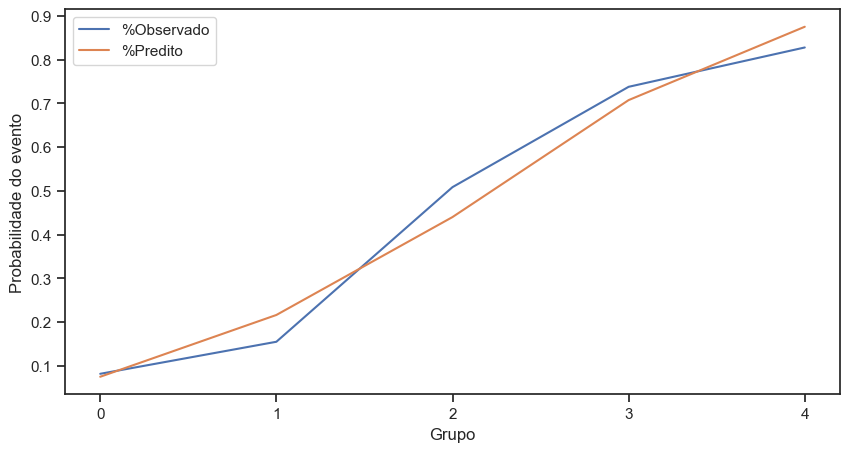

In [39]:
# Visualização gráfica

# theme
sns.set_theme(style='ticks')

fig = plt.figure(figsize=[10,5])
ax = fig.add_subplot(111)

ax = qualidade['pct_doente'].plot(label='%Observado')
ax = qualidade['predito_media'].plot(label='%Predito')

ticks = ax.set_xticks([0,1,2,3,4])
labels = ax.set_xticklabels([0,1,2,3,4])
ax.legend(loc='upper left')
ax.set_ylabel('Probabilidade do evento')
ax.set_xlabel('Grupo')
plt.show()

5. Avalie o seu modelo quanto a discriminação calculando acurácia, GINI e KS.

In [41]:
df[['flag_doente', 'val_preditos']].head()

,flag_doente,val_preditos
0,0,0.458086
1,1,0.942756
2,1,0.884350
3,0,0.139590
4,0,0.028736


##### Curva ROC

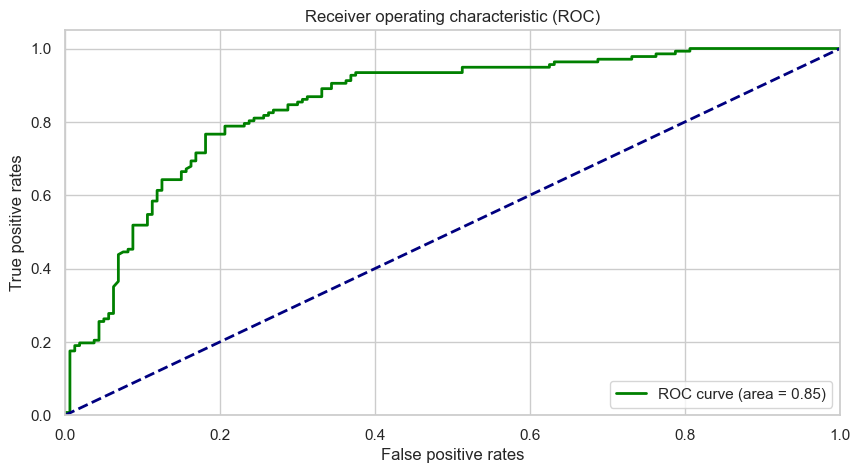

In [43]:
# Informando o evendo verdadeiro e a probabilidade predita para o evendo (pelo modelo)
fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['val_preditos'])

# Figura
sns.set_theme(style='whitegrid')
plt.figure(figsize=[10,5])

auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='green', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0,1],[0,1], color='navy', lw=2, ls='--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False positive rates')
plt.ylabel('True positive rates')
plt.title('Receiver operating characteristic (ROC)')

plt.legend(loc='lower right')
plt.show()

Quanto maior for a área da curva ROC melhor será a qualidade do modelo.

##### Kolmogorov-Smirnov (KS)

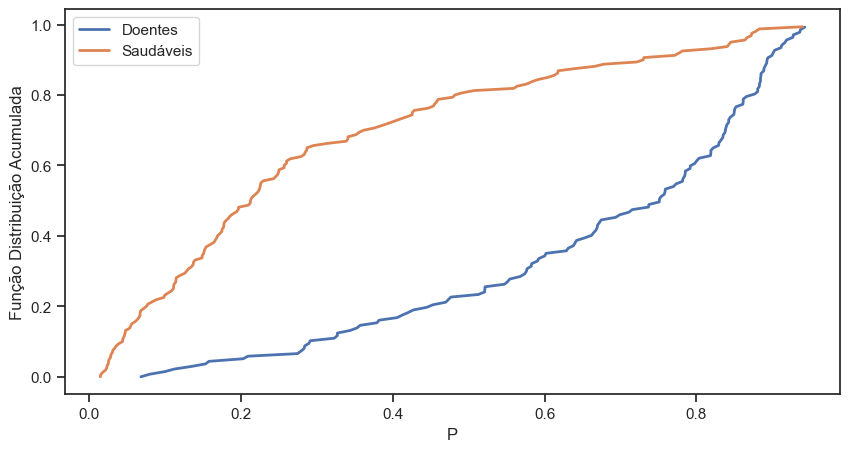

In [46]:
plt.figure(figsize=[10, 5])
sns.set_theme(style='ticks')

score_doente = df.loc[df['flag_doente'] == 1, 'val_preditos']
plt.plot(np.sort(score_doente), np.linspace(0, 1, len(score_doente), endpoint=False), label='Doentes', lw=2)
score_saudaveis = df.loc[df['flag_doente'] != 1, 'val_preditos']
plt.plot(np.sort(score_saudaveis), np.linspace(0, 1, len(score_saudaveis), endpoint=False), label='Saudáveis', lw=2)

plt.xlabel('P')
plt.ylabel('Função Distribuição Acumulada')

plt.legend()

Quanto maior for a distância entre as duas curvas melhor será a taxa de discriminação do modelo.

##### Acurácia, GINI e KS

In [49]:
# Acurácia
acuracia = metrics.accuracy_score(df.flag_doente, df.val_preditos > .5)
print('--> Acurácia de {:.2f}%'.format(acuracia*100))

# Área da curva ROC
fpr, tpr, thresholds = metrics.roc_curve(df.flag_doente, df.val_preditos)
auc = metrics.auc(fpr, tpr)

# Gini
gini = 2*auc - 1

# KS
ks = ks_2samp(df.loc[df.flag_doente == 1, 'val_preditos'], df.loc[df.flag_doente != 1, 'val_preditos']).statistic

print('KS: {:.2f}% \nAUC: {:.2f}% \nGini: {:.2f}%'
      .format(ks*100, auc*100, gini*100))

--> Acurácia de 79.12%
KS: 58.52% 
AUC: 84.87% 
Gini: 69.74%


6. tente melhorar o modelo obtido, por exemplo inserindo ou removendo variáveis.  
    Avalie as características do seu modelo (calibragem e acurácia).

In [51]:
# Obtendo variáveis
nomes_var = df.drop(columns=['flag_doente', 'val_preditos','diagnostico_doenca'])
string = ' + '.join(nomes_var)
string

'idade + sexo + tipo_dor_peito + pressao_sanguínea_repouso + colesterol + acucar_sangue_jejum + resultados_eletrocardiograma + freq_card_max + angina_exercicio + depressao_st_exercicio + inclinacao_st_exercicio + num_vasos_coloridos + status_normal_defeito'

In [52]:
# Gerando uma regressão geral
reglog_full = smf.logit('flag_doente ~ '+ string, data=df).fit()
reglog_full.summary()

Optimization terminated successfully.
         Current function value: 0.344594
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  297
Model:                          Logit   Df Residuals:                      283
Method:                           MLE   Df Model:                           13
Date:                Sat, 15 Feb 2025   Pseudo R-squ.:                  0.5007
Time:                        08:12:29   Log-Likelihood:                -102.34
converged:                       True   LL-Null:                       -204.97
Covariance Type:            nonrobust   LLR p-value:                 1.136e-36
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -7.3720      2.879     -2.560      0.010     -13.016      -1.728
idade                           -0.0142      0.024     -0.591      0.555      -0.061       0.033
sexo                             1.3121      0.488      2.686      0.007       0.355       2.269
tipo_dor_peito                   0.5759      0.191      3.012      0.003       0.201       0.951
pressao_sanguínea_repouso        0.0240      0.011      2.241      0.025       0.003       0.045
colesterol                       0.0050      0.004      1.324      0.186      -0.002       0.012
acucar_sangue_jejum             -1.0219      0.555     -1.840      0.066      -2.110       0.067
resultados_eletrocardiograma     0.2452      0.185      1.325      0.185      -0.117       0.608
freq_card_max                   -0.0207      0.010     -2.021      0.043      -0.041      -0.001
angina_exercicio                 0.9261      0.413      2.241      0.025       0.116       1.736
depressao_st_exercicio           0.2474      0.212      1.168      0.243      -0.168       0.663
inclinacao_st_exercicio          0.5700      0.363      1.570      0.116      -0.142       1.282
num_vasos_coloridos              1.2677      0.265      4.777      0.000       0.748       1.788
status_normal_defeito            0.3439      0.100      3.427      0.001       0.147       0.541
================================================================================================
"""

**Selecionando algumas variáveis com base em suas métricas. Considerando *P-value* abaixo de $5$%.**

In [54]:
reglog2 = smf.logit('flag_doente ~ C(sexo) + C(tipo_dor_peito) + pressao_sanguínea_repouso'
                    '+ freq_card_max + angina_exercicio + C(num_vasos_coloridos)'
                    '+ C(status_normal_defeito)', data=df).fit()
reglog2.summary()

Optimization terminated successfully.
         Current function value: 0.345332
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  297
Model:                          Logit   Df Residuals:                      284
Method:                           MLE   Df Model:                           12
Date:                Sat, 15 Feb 2025   Pseudo R-squ.:                  0.4996
Time:                        08:12:29   Log-Likelihood:                -102.56
converged:                       True   LL-Null:                       -204.97
Covariance Type:            nonrobust   LLR p-value:                 3.297e-37
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -2.8923      2.098     -1.379      0.168      -7.005       1.220
C(sexo)[T.1.0]                      1.2632      0.465      2.714      0.007       0.351       2.175
C(tipo_dor_peito)[T.2.0]            0.4226      0.714      0.592      0.554      -0.976       1.822
C(tipo_dor_peito)[T.3.0]           -0.0288      0.655     -0.044      0.965      -1.312       1.254
C(tipo_dor_peito)[T.4.0]            1.7653      0.627      2.813      0.005       0.535       2.995
C(num_vasos_coloridos)[T.1.0]       1.7901      0.454      3.940      0.000       0.900       2.681
C(num_vasos_coloridos)[T.2.0]       2.7259      0.615      4.430      0.000       1.520       3.932
C(num_vasos_coloridos)[T.3.0]       2.0518      0.792      2.590      0.010       0.499       3.605
C(status_normal_defeito)[T.6.0]     0.2750      0.737      0.373      0.709      -1.169       1.719
C(status_normal_defeito)[T.7.0]     1.5987      0.405      3.946      0.000       0.805       2.393
pressao_sanguínea_repouso           0.0248      0.010      2.473      0.013       0.005       0.044
freq_card_max                      -0.0273      0.010     -2.806      0.005      -0.046      -0.008
angina_exercicio                    0.8328      0.420      1.982      0.047       0.009       1.656
===================================================================================================
"""

In [55]:
df['val_preditos_2'] = reglog2.predict()

# Categorizando os preditos
cat_pred2 = pd.qcut(df['val_preditos_2'], q = 5, duplicates='drop')
cat_pred2.value_counts().sort_index()

# Avaliando a probabilidade média de evento por grupo
grup_reg2 = df.groupby(cat_pred2, observed=False)
qualidade2 = grup_reg2[['flag_doente']].count().rename(columns={'flag_doente': 'Contagem'})

# média
qualidade2['predito_media'] = grup_reg2['val_preditos_2'].mean()

# Defindindo a taxa de eventos por grupo
qualidade2['pct_doente'] = grup_reg2['flag_doente'].mean()
qualidade2

,Contagem,predito_media,pct_doente
val_preditos_2,,,
"(0.00317, 0.0635]",60,0.030820,0.016667
"(0.0635, 0.233]",59,0.121491,0.152542
"(0.233, 0.626]",59,0.392522,0.389831
"(0.626, 0.94]",59,0.786843,0.779661
"(0.94, 0.997]",60,0.973338,0.966667


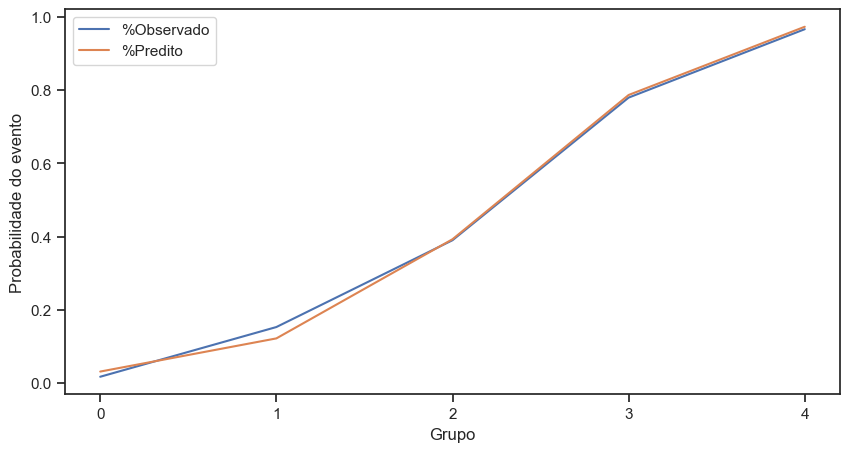

In [56]:
# Gráfico

fig = plt.figure(figsize=[10,5])
ax = fig.add_subplot(111)

ax = qualidade2['pct_doente'].plot(label='%Observado')
ax = qualidade2['predito_media'].plot(label='%Predito')

ax.set_xticks([0,1,2,3,4])
ax.set_xticklabels([0,1,2,3,4])
ax.legend(loc='upper left')
ax.set_ylabel('Probabilidade do evento')
ax.set_xlabel('Grupo')
plt.show()

##### Gerando a curva ROC

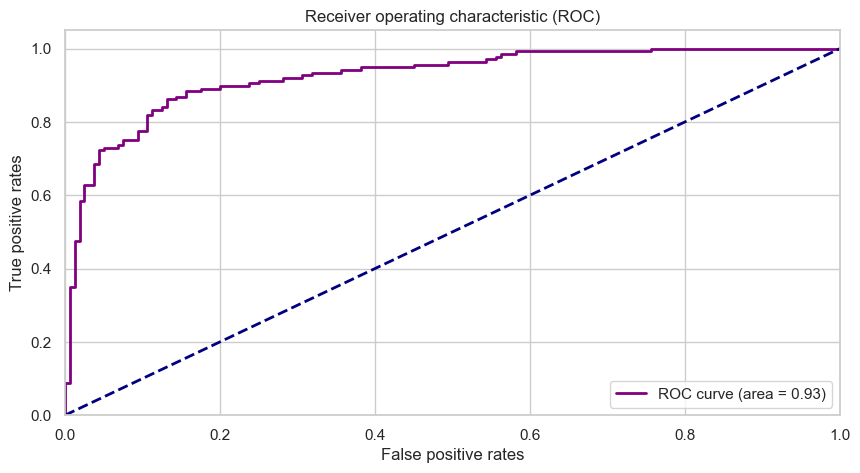

In [58]:
# Otendo valores de false/true positive rates
fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['val_preditos_2'])

# Figura
sns.set_theme(style='whitegrid')
plt.figure(figsize=[10,5])

auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='purple', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0,1],[0,1], color='navy', lw=2, ls='--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False positive rates')
plt.ylabel('True positive rates')
plt.title('Receiver operating characteristic (ROC)')

plt.legend(loc='lower right')
plt.show()

##### Gerando analise Kolmogorov-Smirnov (KS)

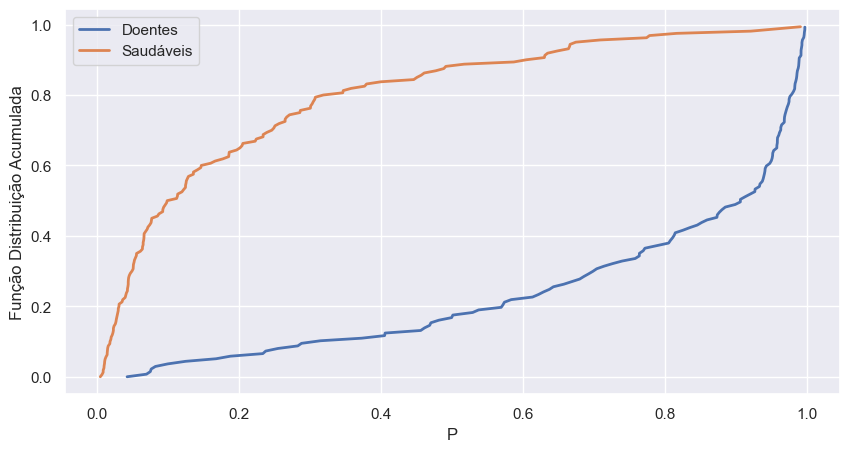

In [60]:
plt.figure(figsize=[10, 5])
sns.set_theme(style='darkgrid')

score_doente = df.loc[df['flag_doente'] == 1, 'val_preditos_2']
plt.plot(np.sort(score_doente), np.linspace(0, 1, len(score_doente), endpoint=False), label='Doentes', lw=2)
score_saudaveis = df.loc[df['flag_doente'] != 1, 'val_preditos_2']
plt.plot(np.sort(score_saudaveis), np.linspace(0, 1, len(score_saudaveis), endpoint=False), label='Saudáveis', lw=2)

plt.xlabel('P')
plt.ylabel('Função Distribuição Acumulada')

plt.legend()

##### Acurácia, GINI e KS

In [62]:
# Acurácia
acuracia = metrics.accuracy_score(df['flag_doente'], df['val_preditos_2'] > .5)
print('--> Acurácia de {:.2f}%'.format(acuracia*100))

# Área da curva ROC
fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['val_preditos_2'])
auc = metrics.auc(fpr, tpr)

# Gini
gini = 2*auc - 1

# KS
ks = ks_2samp(df.loc[df.flag_doente == 1, 'val_preditos_2'], df.loc[df.flag_doente != 1, 'val_preditos_2']).statistic

print('KS: {:.2f}% \nAUC: {:.2f}% \nGini: {:.2f}%'
      .format(ks*100, auc*100, gini*100))

--> Acurácia de 85.86%
KS: 73.01% 
AUC: 92.54% 
Gini: 85.07%


### Insights

Com o objetivo de selecionar as variáveis mais significativas um modelo de regressão logística contendo todas as informação foi gerado e, a partir dele, filtrei as variáveis com base em seu *P-value*. A partir dessa metodologia obtive as seguintes melhorias:
- Acurácia: $79.12$% $\rightarrow 85.86$%
- KS:       $58.52$% $\rightarrow 73.01$%
- AUC:      $84.87$% $\rightarrow 92.54$%
- Gini:     $69.74$% $\rightarrow 85.07$%